# RandomForest 및 Bagging 설명
※ 앙상블(ensemble)은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

> - Ensemble기법 중 하나로 여러 개의 Decision tree model로 이뤄져 있으며, bagging 기반의 모델
> - bagging 기반 모델의 일반화 성능이 좋게 나오기 위해서는 각각의 약분류기(weak classifier)의 성능은 좋고, 성격이 달라야함
> - 랜덤포레스트는 각각의 부트스트랩을 생성할 때, feature에 대해서도 random selection하는 것이 특징
> - 의사결정 나무와 비교해 이상치와 잡음(Outlier and noise)에 대해 상대적으로 강하며, tree의 수가 많아져도 과적합(overfitting) 문제에 덜 민감함

Breiman, L., “Random
Forests”, Machine Learning, Vol 45, No 1, 2001, pp 5-32과 Liaw, Andy and
Wiener, Matthew "Classification and Regression by randomForest," R News Vol 2,
No 3, 2002, pp. 18-22

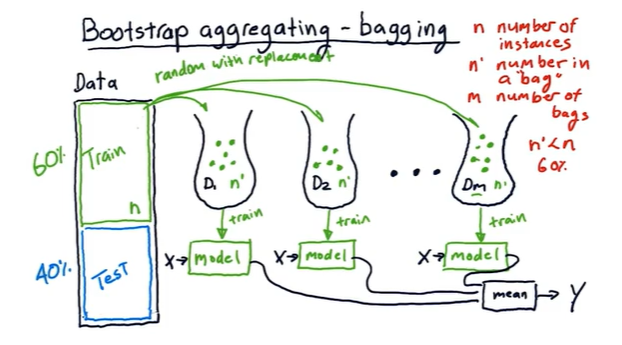

In [39]:
import os
#os.chdir(r'C:/Users/User/Desktop')
#os.getcwd()

In [40]:
from IPython.display import Image

In [41]:
#Image("img/bagging.png",  width=800, height=800)

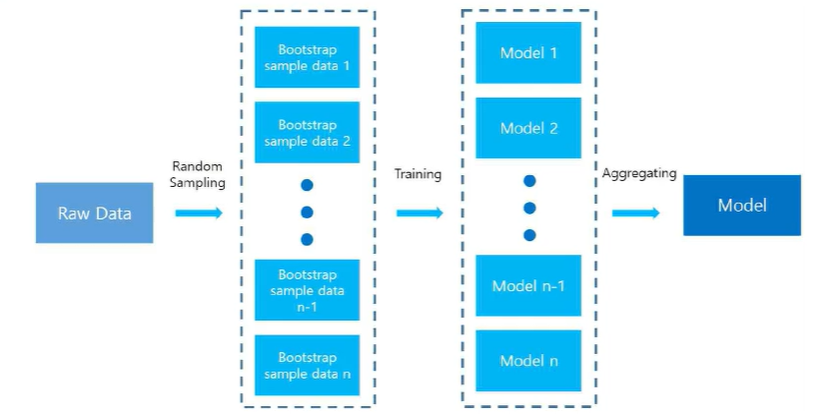

In [42]:
#Image("img/RF.png",  width=800, height=800)

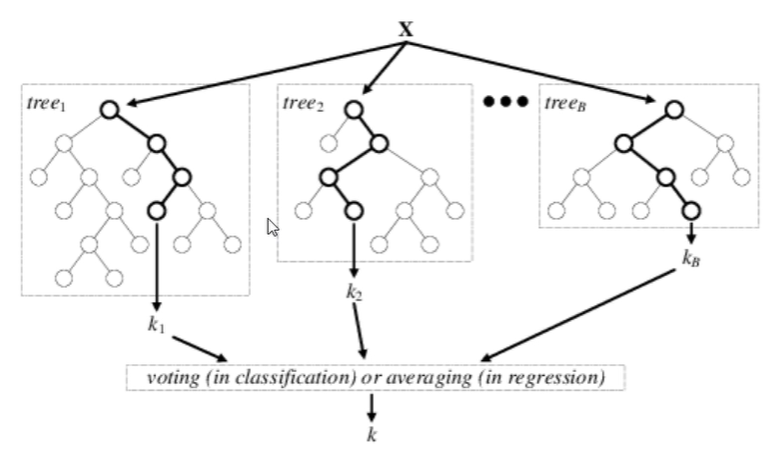

In [43]:
# Basic tool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Data split
from sklearn.model_selection import train_test_split

## 1. classification

In [45]:
#Image("img/make_moons.png",  width=500, height=500)

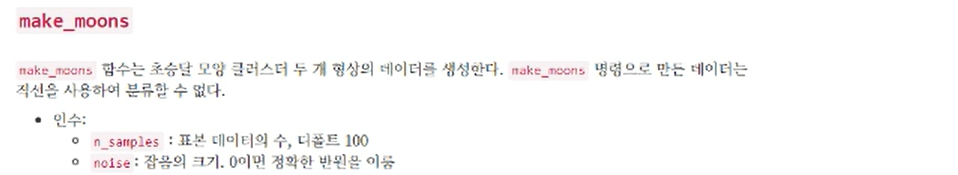

(200, 2)


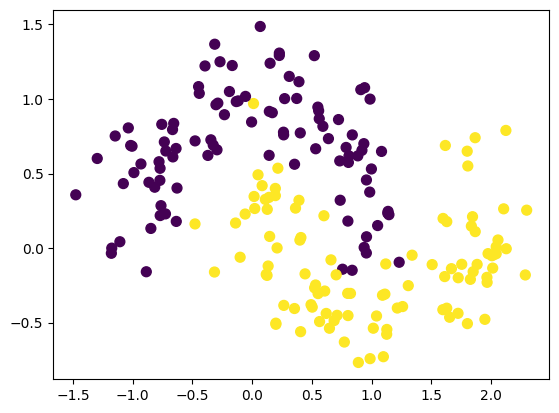

In [46]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise=0.2, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y, s=50)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
# binary class
y

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1])

### Decision tree vs Randomforest

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=42)

dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, oob_score=True, \
                            criterion='gini', max_depth=5, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, oob_score=True,
                       random_state=42)

In [50]:
print(dt_gini.score(X_test,y_test))
print(rfc.score(X_test,y_test))

0.9
0.95


### 여러가지 기능

In [51]:
#1. estimators_: Randomforest에 포함된 Decision tree
print(rfc.estimators_[:3])
print(len(rfc.estimators_))

[DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542), DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1273642419), DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1935803228)]
20


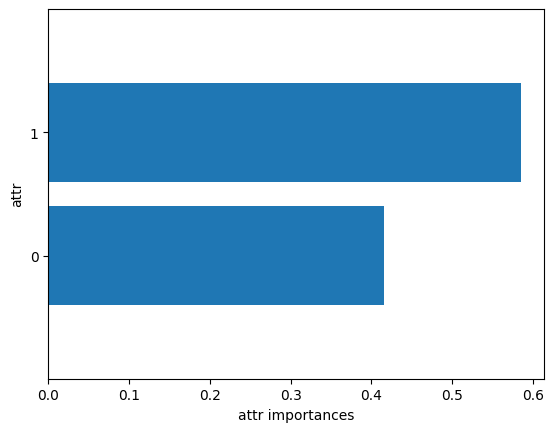

In [52]:
#2. feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것

def plot_feature_importances(model):

    n_features = X.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features))

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

plot_feature_importances(rfc)
plt.show()

In [53]:
# 3. oob_score -> test data로 성능 평가와 비슷
## train data 중 포함되지 않은 data로 성능측정
rfc.oob_score_

0.9375

In [54]:
rfc.predict_proba(X_test)

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.9, 0.1],
       [0. , 1. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [0.5, 0.5],
       [0.6, 0.4],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0.3, 0.7],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.4, 0.6],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       [0.3, 0.7],
       [0. , 1. ],
       [1. , 0. ]])

In [55]:
rfc.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0])

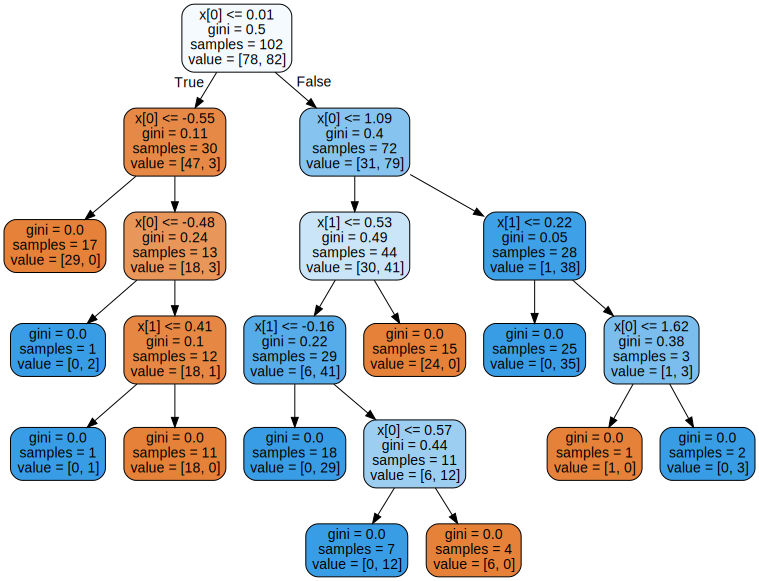

In [56]:
# randomforest 중 일부 트리 graph화
estimator = rfc.estimators_[15]

import graphviz
from sklearn.tree import export_graphviz

# Export as dot file
dot_data = export_graphviz(estimator,
                rounded = True, proportion = False,
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)
graph

In [57]:
!pip install mglearn

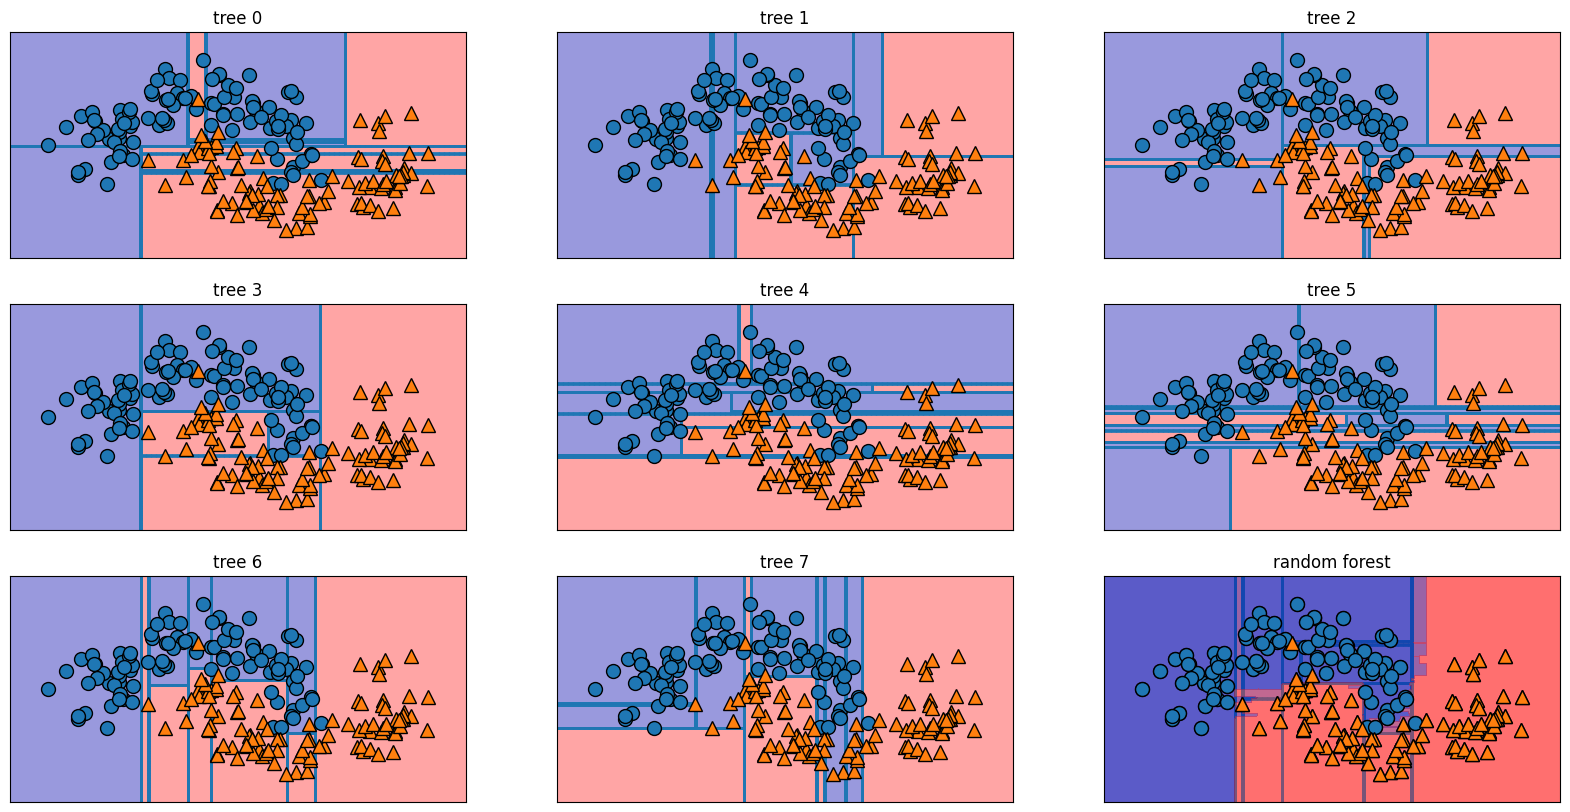

In [58]:
import mglearn

fig, axes = plt.subplots(3, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), rfc.estimators_)):

    ax.set_title("tree {}".format(i))

    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(rfc, X, fill=True, ax=axes[-1, -1], alpha=.4)

axes[-1, -1].set_title("random forest")

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.show()

## 2. Regression

### Data 생성

In [59]:
#from sklearn.datasets import load_boston as boston
#bos = boston()
from sklearn import datasets
bos = datasets.fetch_openml('boston')

X = bos['data']
y = bos['target']
col_names = bos.feature_names

boston_x = pd.DataFrame(data=X, columns= col_names)
boston_x['MEDV'] = y
y = boston_x.MEDV.copy()
del boston_x['MEDV']
boston = pd.concat((boston_x,y), axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [60]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Data scailing
> 데이터 스케일링을 해주는 이유는 데이터의 값이 너무 크거나 혹은 작은 경우에 모델 알고리즘 학습과정에서 0으로 수렴하거나 무한으로 발산해버릴 수 있기 때문

* 장점: 다차원의 값들을 비교 및 분석하기 쉬움 , 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상
* 단점: 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없음.


In [62]:
# Feature Scaling # 각 feature의 평균을 0, 분산을 1로 변경, 모든 특성들이 같은 스케일을 갖게 됨.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# train data는 fit_transform 스케일링
X_train = sc.fit_transform(X_train)

# test data는 transform으로 스케일링
X_test = sc.transform(X_test)

In [63]:
np.set_printoptions(suppress=True, precision=True)
X_train

array([[-0.4, -0.5, -0.7, ..., -0.5,  0.4, -0.4],
       [-0.4, -0.5, -0. , ...,  0.3,  0.2, -0.4],
       [-0.4,  0.8, -0.9, ..., -0.8,  0.4, -0.2],
       ...,
       [-0.4, -0.5, -0.2, ..., -0.3,  0.4, -0.3],
       [-0.4, -0.5, -0.6, ..., -0.3,  0.4,  0.8],
       [-0.4, -0.5, -1. , ..., -0.8,  0.4,  0.3]])

### Decision tree vs Randomforest

In [67]:
# Decision tree #
from sklearn.tree import DecisionTreeRegressor as dtr
#dtr = dtr(criterion='mse', max_depth=5, random_state=42)
dtr = dtr(criterion='squared_error', max_depth=5, random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [68]:
# random forest #
from sklearn.ensemble import RandomForestRegressor

#rfr= RandomForestRegressor(n_estimators=80, oob_score=True, max_features=7, criterion='mse', max_depth=5, random_state=42)
rfr= RandomForestRegressor(n_estimators=80, oob_score=True, max_features=7, criterion='squared_error', max_depth=5, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=7, n_estimators=80,
                      oob_score=True, random_state=42)

In [69]:
print(f'Decision tree feature importances: {dtr.feature_importances_}')
print(f'Random forest feature importances: {rfr.feature_importances_}')

Decision tree feature importances: [0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.6]
Random forest feature importances: [0.1 0.  0.  0.  0.  0.4 0.  0.  0.  0.  0.1 0.  0.4]


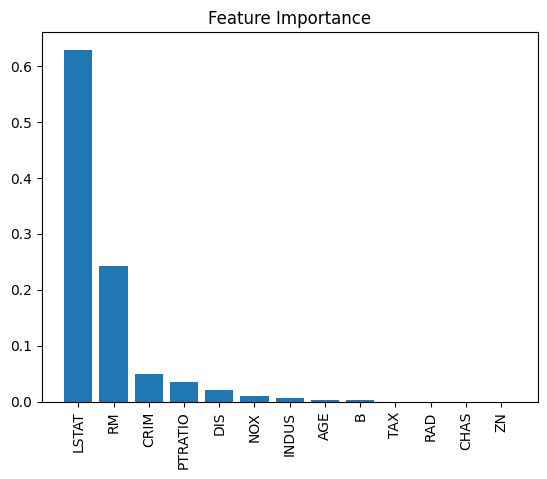

In [70]:
#2. feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것
## Decision tree 기준

def plot_feature_importances(model):
    importances = model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [bos.feature_names[i] for i in indices]

    # Create plot
    plt.figure()

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(X.shape[1]), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X.shape[1]), names, rotation=90)

    # Show plot
    plt.show()

plot_feature_importances(dtr)
plt.show()

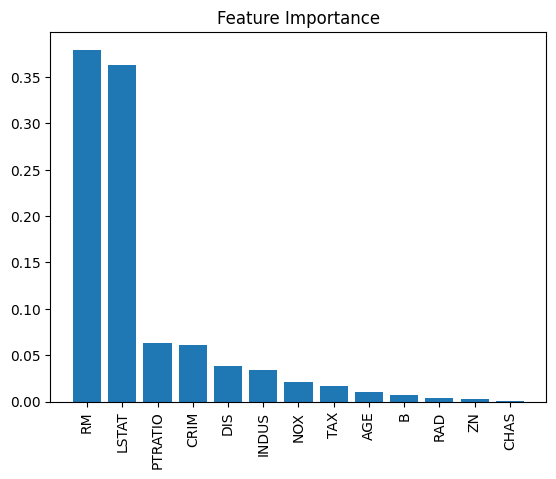

In [71]:
#2. feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것
## randomforest 기준
def plot_feature_importances(model):
    importances = model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [bos.feature_names[i] for i in indices]

    # Create plot
    plt.figure()

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(X.shape[1]), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X.shape[1]), names, rotation=90)

    # Show plot
    plt.show()

plot_feature_importances(rfr)
plt.show()

In [72]:
# out of bag score
rfr.oob_score_

0.8789615948475198

In [73]:
# decision tree vs randomforest
print(dtr.score(X_test,y_test))
print(rfr.score(X_test,y_test))

0.5827780673992133
0.723571638856181


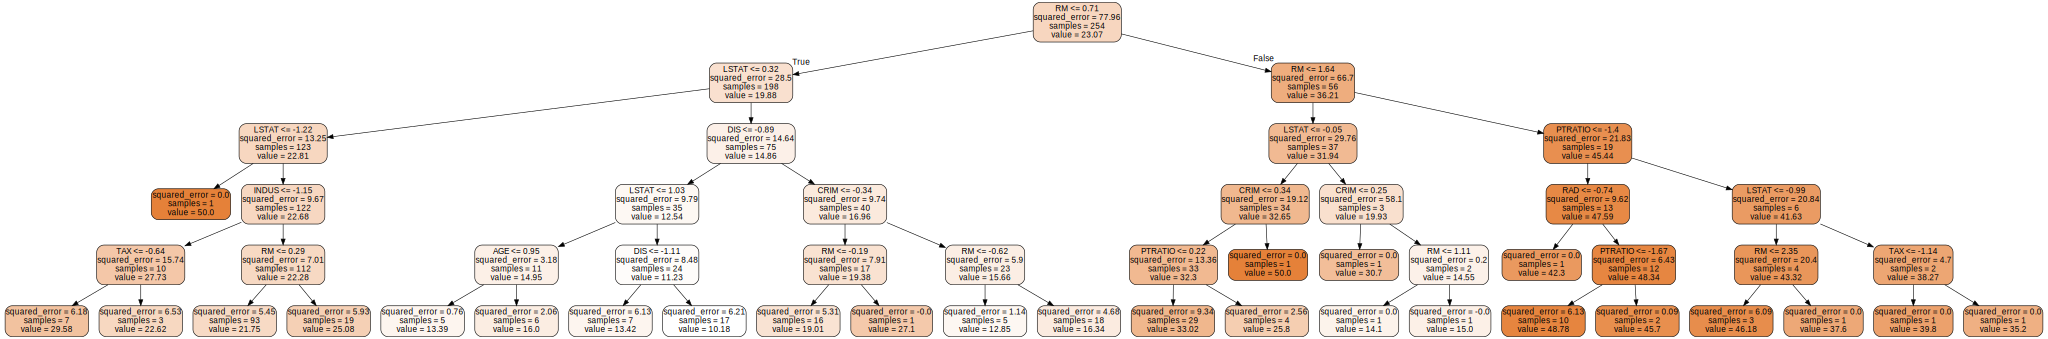

In [74]:
# randomforest 중 일부 트리 graph화
estimator = rfr.estimators_[50]

from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator,
                feature_names = bos.feature_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)
graph

In [75]:
n_nodes = []
max_depths = []

for ind_tree in rfr.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

In [76]:
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 54
Average maximum depth 5


In [77]:
# RandomForestRegressor 기준 #
from sklearn import metrics

y_pred = rfr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.927191735598429
Mean Squared Error: 22.509129960380143
Root Mean Squared Error: 4.7443787749694


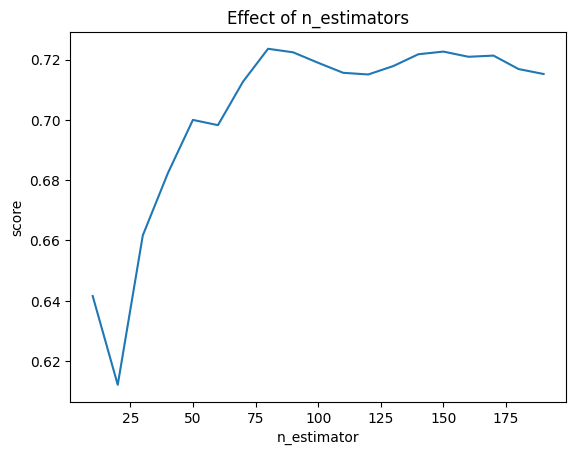

In [78]:
# random forest에 속한 decision tree별 성능변화
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rfr.set_params(n_estimators=n)
    rfr.fit(X_train, y_train)
    scores.append(rfr.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)